# Implementación de Árboles aleatorios y RFE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

file_name = 'breast_cancer.csv'
# Carga el conjunto de datos de entrada
dataframe = pd.read_csv(file_name)

# Carga las características o variables predictoras en X (todas las columnas menos la última)
X = dataframe.iloc[:, :-1]

# La variable objetivo 'y' (target) es la última columna
y = dataframe.iloc[:, -1]

# Obtiene el número de columnas de X
maximo = X.shape[1]

dataframe

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [3]:
# Crea un modelo de bosque aleatorio
modelo = RandomForestClassifier(random_state=42)


# Divide el conjunto de datos en entrenamiento (80%) y pruebas (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Inicio de la selección de características

print("\nTrabajando en la seleccion...")
best_features = pd.Index([])
scores=[]
values=[]
n_features = 0
roc = 0

for i in range(2, maximo+1):
    
    # Crea el selector RFE para seleccionar i características
    selector_caracteristicas = RFE(modelo, n_features_to_select=i, step=1)

    # Ajustar el selector al conjunto de datos
    selector_caracteristicas = selector_caracteristicas.fit(X_train, y_train)
    
    # Obtener las características seleccionadas
    selected_features = X.columns[selector_caracteristicas.support_]

    # Crea un nuevo dataframe únicamente con las características seleccionadas
    X_new = dataframe.loc[:, selected_features]

    # Divide el nuevo dataframe en 80% de entrenamiento y 20% de prueba 
    X_ntrain, X_ntest, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

    # Ajusta el modelo 
    modelo.fit(X_ntrain,y_train)

    # Hace predicciones con el modelo ajustado 
    y_pred = modelo.predict(X_ntest)

    # Calcular ROC AUC ('y' reales vs 'y' predichas)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Guarda para graficar
    scores.append(roc_auc)
    values.append(i)
    
    # Guarda el mejor ROC AUC hallado hasta el momento
    if roc_auc > roc:
        roc = roc_auc
        best_features = selected_features
        n_features = i

# Fin de la selección de características



Trabajando en la seleccion...


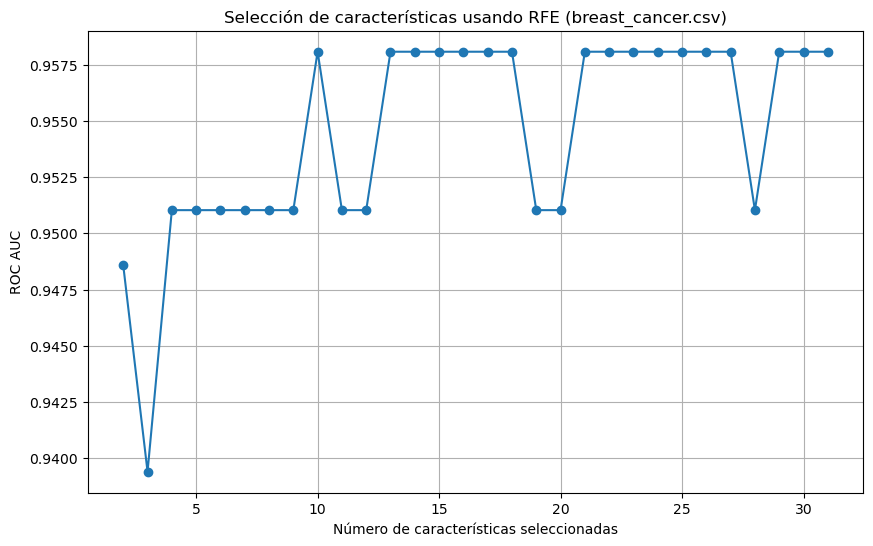


Mejor ROC AUC:  0.9580740255486406

Muestra las 10 características seleccionadas:

texture_mean
perimeter_mean
concavity_mean
concave points_mean
radius_worst
texture_worst
perimeter_worst
area_worst
concavity_worst
concave points_worst


In [5]:
# Graficar resultados
title = f"Selección de características usando RFE ({file_name})"
plt.figure(figsize=(10, 6))
plt.plot(values, scores, marker='o')
plt.xlabel('Número de características seleccionadas')
plt.ylabel('ROC AUC')
plt.title(title)
plt.grid(True)
plt.show()        

# Muestra la lista de características seleccionadas   
print("\nMejor ROC AUC: ", roc ) 
message = f"\nMuestra las {n_features} características seleccionadas:\n"
print(message)
for feature in best_features:
        print(feature)


Metricas de rendimiento:

Exactitud (Accuracy): 0.9649122807017544
Precisión (Precision): 0.975609756097561
Sensibilidad (Recall): 0.9302325581395349
Puntuación F1 (F1 Score): 0.9523809523809524
ROC AUC:  0.9580740255486406
Matriz de confusión


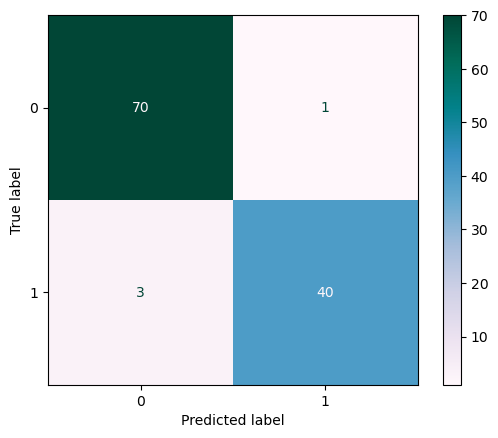

In [6]:

# Crea un dataframe con las mejores características seleccionadas
X_best = dataframe.loc[:, best_features]

# Divide el conjunto de datos en 80% de entrenamiento y 20% de prueba 
X_btrain, X_btest, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

# Ajusta el modelo
modelo.fit(X_btrain,y_train)

    # Hace predicciones
y_pred = modelo.predict(X_btest)

# Calcular las métricas ('y' reales vs 'y' predichas)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print("\nMetricas de rendimiento:\n")
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Sensibilidad (Recall):", recall)
print("Puntuación F1 (F1 Score):", f1)
print("ROC AUC: ",roc_auc )


# Despliega la matriz de confusión
print("Matriz de confusión")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.PuBuGn)
plt.show()

# Implementación KNN

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
#Características seleccionadas
print("\nCaracterísticas seleccionadas:")
for feature in best_features:
        print(feature)
#Normaliza los datos
X_best = StandardScaler().fit_transform(X_best)

#Divide el conjunto de datos en entrenamiento (80%) y pruebas (20%)
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

#Calcular k
k = int(np.sqrt( X.shape[0]));

if k%2==0: #Hacer que K sea impar 
   k=k+1

print("\nValor de k: ", k)


Características seleccionadas:
texture_mean
perimeter_mean
concavity_mean
concave points_mean
radius_worst
texture_worst
perimeter_worst
area_worst
concavity_worst
concave points_worst

Valor de k:  23



Metricas de rendimiento:

Exactitud (Accuracy): 0.9824561403508771
Precisión (Precision): 1.0
Sensibilidad (Recall): 0.9534883720930233
Puntuación F1 (F1 Score): 0.9761904761904763
ROC AUC:  0.9767441860465116
Matriz de confusión


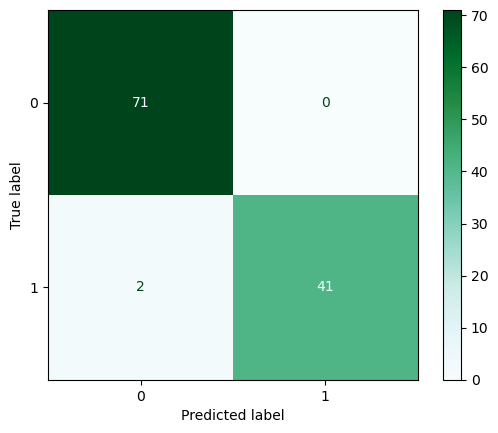

In [8]:
# Crea un modelo de machine learning k-NN 
k_nn_model = KNeighborsClassifier(n_neighbors=k)

# Entranamiento
k_nn_model.fit(X_train, y_train)

#Prueba el modelo 
y_pred = k_nn_model.predict(X_test)

# Calcular las métricas ('y' reales vs 'y' predichas)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print("\nMetricas de rendimiento:\n")
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Sensibilidad (Recall):", recall)
print("Puntuación F1 (F1 Score):", f1)
print("ROC AUC: ",roc_auc )

# Despliega la matriz de confusión
print("Matriz de confusión")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="BuGn")

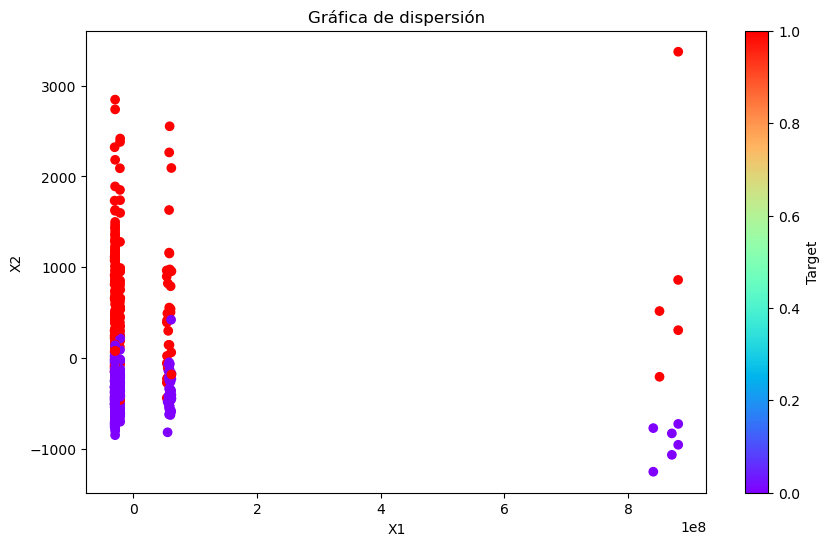

In [9]:
# Aplica análisis de componentes principales
# para reducir las dimensiones y poder graficar en 2D

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


df_pca = pd.DataFrame(data=X_pca, columns=['X_1', 'X_2'])
df_pca['objetivo'] = y

# Gráfica de dispersión (Componentes principales)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['X_1'], df_pca['X_2'], c=df_pca['objetivo'], cmap='rainbow')
plt.colorbar(scatter, label='Target')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Gráfica de dispersión')
plt.show()

Predicciones con otros datos

In [22]:
#Datos sinteticos
prod_features = [15.062704,111.692972,0.046360,	0.037910,19.586741,18.961606,125.303183,1478.237524,-0.022755,0.027637]
#prod_features = [24.561366,58.815533,0.060329, 0.008334,7.303539,26.974970, 46.317386, -123.056994, 0.146160, 0.022793]
print("Dartos del paciente Andy:")
df_prod = pd.DataFrame([prod_features], columns=best_features)
print(df_prod)

# Normalizar los datos capturados
escaler = StandardScaler()
df_prod = escaler.fit_transform(df_prod)

prediccion = k_nn_model.predict(df_prod)

if prediccion[0] == 1:
    print("\nTienes cáncer Andy")
else:
    print("\nNo tienes cáncer Andy")

Dartos del paciente Andy:
   texture_mean  perimeter_mean  concavity_mean  concave points_mean  \
0     15.062704      111.692972         0.04636              0.03791   

   radius_worst  texture_worst  perimeter_worst   area_worst  concavity_worst  \
0     19.586741      18.961606       125.303183  1478.237524        -0.022755   

   concave points_worst  
0              0.027637  

No tienes cáncer Andy
